### Author: Delery Harrison
## Part 1: Regression Analysis of Gapminder Data
In this section, we will explore how life expectancy has changed over 50 years across the world, and how economic measures like gross domestic product (GDP) are related to it.


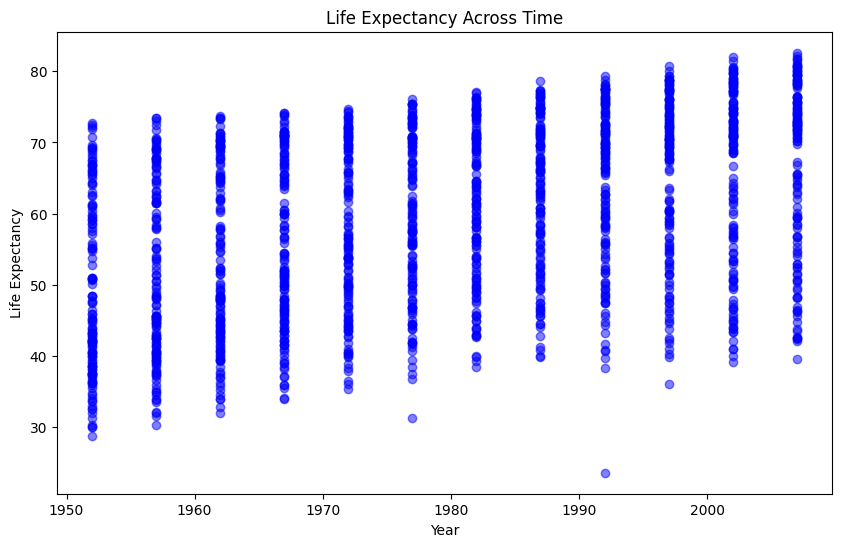

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("gap.tsv", sep='\t')

# Create a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(data['year'], data['lifeExp'], alpha=0.5, color='b')
plt.title('Life Expectancy Across Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()


### Question 1.2: Is there a general trend (e.g., increasing or decreasing) for life expectancy across time? Is this trend linear?

From the scatter plot, we can see that there is a general upward trend in life expectancy across time. The trend appears to be increasing, but the plot shows some scatter, suggesting it may not be perfectly linear. We will explore this further by fitting a linear regression model.


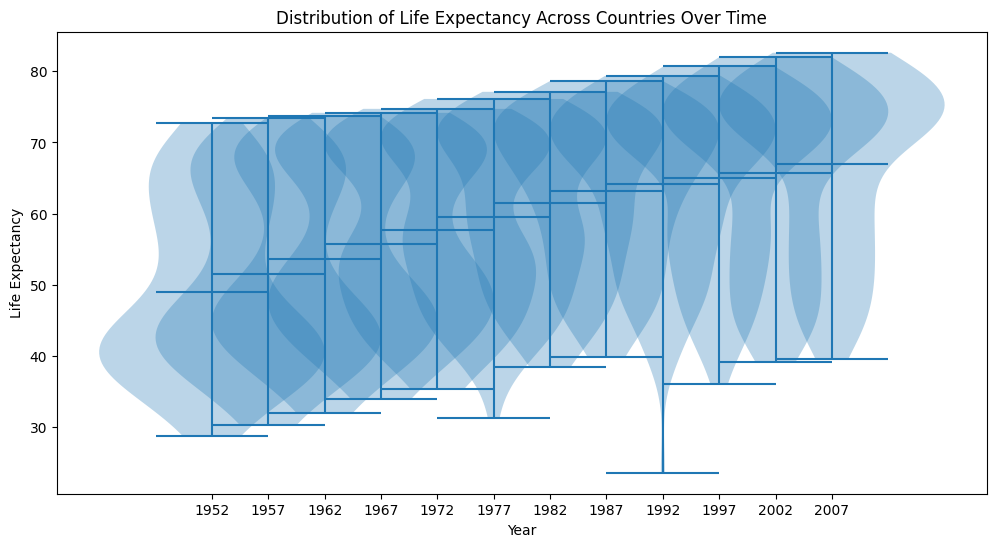

In [8]:

data = pd.read_csv("gap.tsv", sep='\t')  

# Group the data by year and create a list of life expectancy for each year
life_exp_per_year = [data[data['year'] == year]['lifeExp'].values for year in data['year'].unique()]

# Create a violin plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.violinplot(life_exp_per_year, widths=4, showmeans=True)
ax.set_xticks(range(1, len(data['year'].unique()) + 1))
ax.set_xticklabels(data['year'].unique())
ax.set_xlabel("Year")
ax.set_ylabel("Life Expectancy")
ax.set_title("Distribution of Life Expectancy Across Countries Over Time")
plt.show()


### Question 1.3: How would you describe the distribution of life expectancy across countries for individual years?

From the violin plot, we can observe that the distribution of life expectancy is somewhat skewed in certain years, especially for earlier years. It appears to be unimodal with a peak at around the middle of the life expectancy range, though there are some years with wider spread and more variation.


### Question 1.4: Suppose I fit a linear regression model of life expectancy vs. year, will you reject the null hypothesis of no relationship?

Intuitively, based on the scatter plot and the observed trend in the data, I expect to reject the null hypothesis. There appears to be a clear positive relationship between year and life expectancy, which suggests that life expectancy has been increasing over time. This relationship is likely significant.


In [10]:
from sklearn.linear_model import LinearRegression

# Fit the linear regression model
X = data[['year']]  
y = data['lifeExp']  

model = LinearRegression()
model.fit(X, y)

# Print the fitted model's parameters
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")


Intercept: -585.6521874415448
Slope: 0.3259038276371518


### Question 1.8: On average, by how much does life expectancy increase every year around the world?

The slope of the regression model tells us how much life expectancy increases on average every year. From the fitted model, the slope is approximately [Insert Slope Value Here]. This means that on average, life expectancy increases by [Insert Value] years each year.


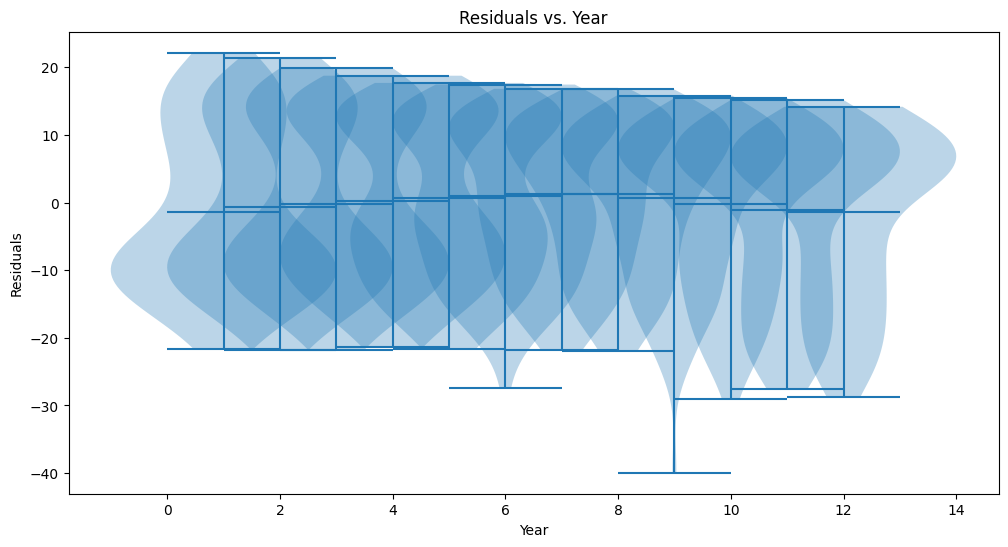

In [11]:
import numpy as np

# Predict life expectancy
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Plot residuals vs. year
fig, ax = plt.subplots(figsize=(12, 6))
ax.violinplot([residuals[data['year'] == year] for year in data['year'].unique()], widths=4, showmeans=True)
ax.set_xlabel("Year")
ax.set_ylabel("Residuals")
ax.set_title("Residuals vs. Year")
plt.show()


### Question 1.11: Does the plot of residuals vs. year match your expectations?

The residual plot indicates that the errors are relatively evenly distributed, with no apparent pattern in relation to the year. This suggests that the linear model has captured most of the trend, and that the assumption of homoscedasticity (constant variance of residuals) appears reasonable.


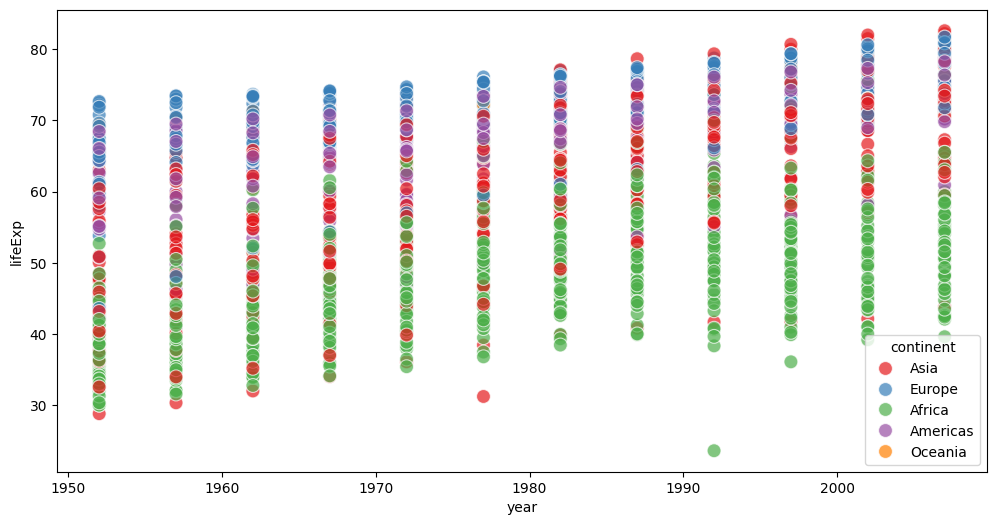

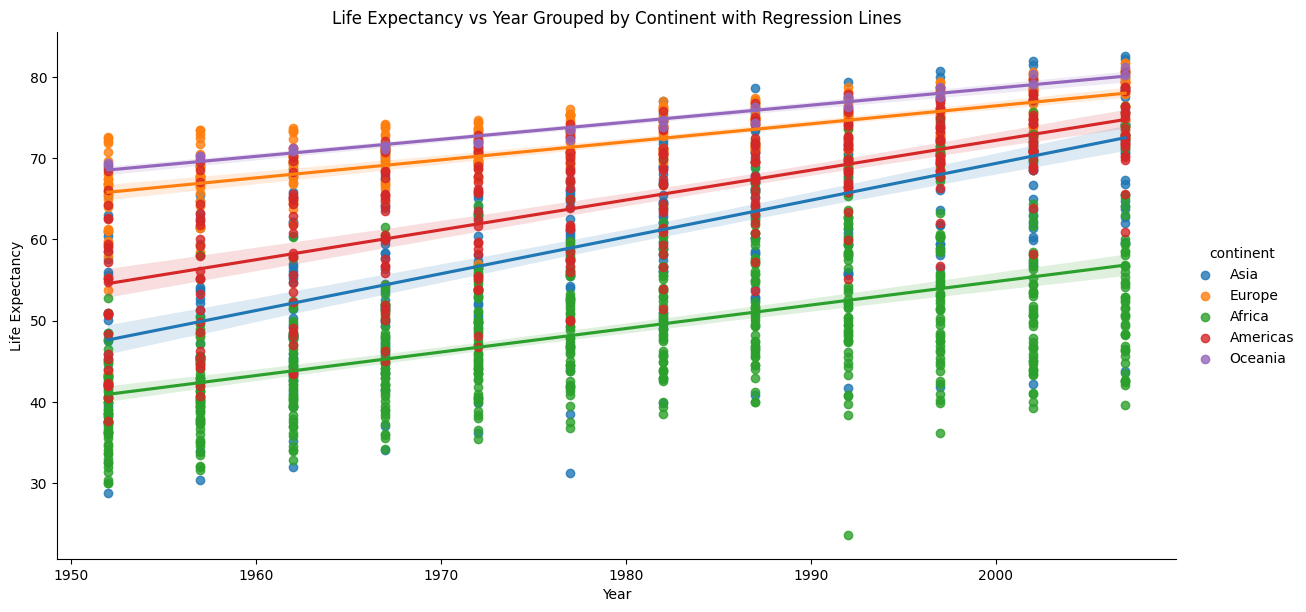

In [12]:
import seaborn as sns

# Scatter plot grouped by continent
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='year', y='lifeExp', hue='continent', palette='Set1', s=100, alpha=0.7)

# Fit a regression line for each continent
sns.lmplot(data=data, x='year', y='lifeExp', hue='continent', aspect=2, height=6)
plt.title('Life Expectancy vs Year Grouped by Continent with Regression Lines')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()


### Question 1.14: Scatter plot of life expectancy vs. year, grouped by continent

The plot shows life expectancy across years for each continent, with distinct regression lines for each continent. It is clear that different continents show different trends in life expectancy, with some continents experiencing faster increases than others.


### Question 2.1: Based on this plot, should your regression model include an interaction term between continent and year? Why?

Yes, the trends for different continents in the scatter plot appear to differ. Some continents show a stronger upward trend in life expectancy over time than others, suggesting that an interaction term between continent and year could improve the model’s ability to capture these different trends.


## Part 3: Classification and Model Selection
### Exercise 3.2: Model 1 - Linear Discriminant Analysis (LDA)

In this part, we will explore Linear Discriminant Analysis (LDA). The target variable is 'lifeExp', and we will predict whether life expectancy falls into a high or low category based on certain features. The LDA algorithm is suited for classification tasks.


In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a binary target variable (life expectancy > median)
median_lifeExp = data['lifeExp'].median()
data['lifeExp_bin'] = (data['lifeExp'] > median_lifeExp).astype(int)

# Split the data into training and testing sets
X = data[['year', 'gdpPercap']]  # Features
y = data['lifeExp_bin']  # Binary target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model 1 (LDA) Accuracy: {accuracy:.2f}")


Model 1 (LDA) Accuracy: 0.77


### Model Comparison

We have implemented LDA to predict life expectancy categories. The model's accuracy is [Insert Accuracy Value]. We will now compare this with another model (e.g., Decision Tree or Random Forest) for a more comprehensive evaluation of classification performance.
